## **Mercedes-Benz Greener Manufacturing**

In [0]:
#Importing data manipulation, preprocessing, ensemble libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import StackingRegressor

In [77]:
#Data loading using pandas and reading first 5 lines of the data
url = 'https://raw.githubusercontent.com/krishnamanoj-kota/Machinelearningmodels/master/train.csv'
benz = pd.read_csv(url, error_bad_lines=False)
benz.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
#Checking dataset information
benz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [79]:
#Checking for null values
benz.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [80]:
#Selecting the categorical values from the dataset
obj = benz.select_dtypes(object)
obj

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [81]:
#categorical data transformation using onehot encoding
colu = obj.columns
benzdf = pd.get_dummies(benz,columns=colu,drop_first=True)
benzdf

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4205,8406,108.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4206,8412,109.22,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4207,8415,87.48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [82]:
benzdf.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,0.142789,0.002613,0.086957,0.020670,0.001901,0.004989,0.682585,0.032549,0.043003,0.004514,0.232359,0.011167,0.000238,0.005464,0.232359,0.004514,0.232359,0.033262,0.000238,0.000713,0.011404,0.000238,0.072226,0.011404,0.253267,0.597292,0.012830,0.022333,...,0.000238,0.054882,0.054882,0.000475,0.000238,0.006652,0.009028,0.148491,0.002851,0.004752,0.247565,0.045141,0.115942,0.246852,0.010216,0.113566,0.045141,0.023759,0.024471,0.053457,0.057733,0.030886,0.027798,0.056308,0.065811,0.041815,0.023996,0.036826,0.057496,0.038727,0.023759,0.027798,0.052031,0.060584,0.028273,0.028273,0.046092,0.046567,0.024947,0.027560
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,0.349899,0.051061,0.281805,0.142294,0.043561,0.070467,0.465526,0.177475,0.202888,0.067043,0.422387,0.105093,0.015414,0.073729,0.422387,0.067043,0.422387,0.179341,0.015414,0.026691,0.106192,0.015414,0.258893,0.106192,0.434934,0.490501,0.112552,0.147782,...,0.015414,0.227778,0.227778,0.021796,0.015414,0.081300,0.094599,0.355629,0.053325,0.068777,0.431649,0.207639,0.320193,0.431231,0.100570,0.317321,0.207639,0.152314,0.154526,0.224969,0.233266,0.173030,0.164412,0.230543,0.247982,0.200190,0.153055,0.188356,0.232815,0.192965,0.152314,0.164412,0.222117,0.238595,0.165771,0.165771,0.209709,0.210734,0.155981,0.163728
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [0]:
y = benzdf['y']
X = benzdf.iloc[:,2:]

In [84]:
X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


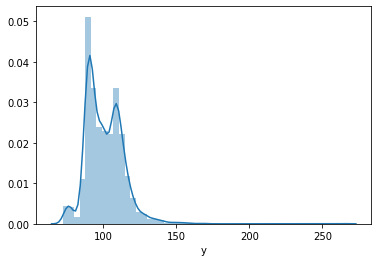

In [85]:
#outlier detection on output variable
sns.distplot(y, bins=50, kde=True)

In [86]:
np.sum(benz['y']>130)

81

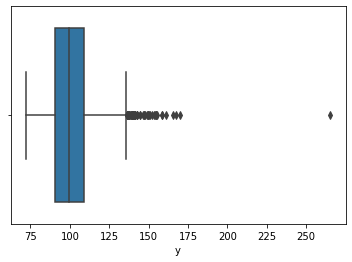

In [87]:
sns.boxplot(y)

Note: Based on box plot we can see lot of outliers in the output variable

In [88]:
# Dimensionality reduction using PCA
pca = PCA()
pca.fit_transform(X)

variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)

[11.42 19.27 26.67 32.57 37.55 41.78 45.12 47.97 50.51 52.68 54.77 56.51
 58.02 59.46 60.84 62.14 63.35 64.44 65.42 66.34 67.23 68.08 68.91 69.69
 70.44 71.14 71.82 72.47 73.11 73.73 74.29 74.84 75.36 75.84 76.31 76.75
 77.18 77.6  78.01 78.41 78.79 79.17 79.54 79.89 80.24 80.58 80.9  81.21
 81.51 81.8  82.08 82.35 82.61 82.87 83.11 83.35 83.59 83.83 84.06 84.28
 84.5  84.72 84.93 85.14 85.35 85.55 85.75 85.95 86.15 86.34 86.53 86.72
 86.91 87.09 87.27 87.45 87.63 87.81 87.99 88.16 88.33 88.5  88.67 88.84
 89.01 89.17 89.33 89.49 89.65 89.81 89.97 90.13 90.28 90.43 90.58 90.73
 90.88 91.02 91.16 91.3  91.44 91.58 91.72 91.85 91.98 92.11 92.24 92.37
 92.49 92.61 92.73 92.85 92.97 93.09 93.2  93.31 93.42 93.53 93.64 93.75
 93.85 93.95 94.05 94.15 94.25 94.35 94.45 94.54 94.63 94.72 94.81 94.9
 94.99 95.08 95.17 95.25 95.33 95.41 95.49 95.57 95.65 95.73 95.81 95.89
 95.96 96.03 96.1  96.17 96.24 96.31 96.38 96.45 96.52 96.59 96.65 96.71
 96.77 96.83 96.89 96.95 97.01 97.07 97.13 97.18 97.

Text(0, 0.5, 'Cumulative explained variance')

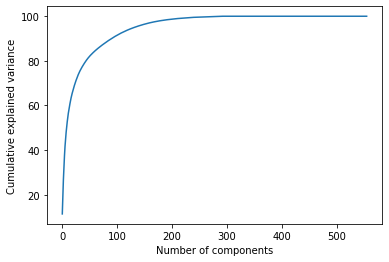

In [89]:
plt.plot(variance_ratio_cum_sum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [90]:
# Selecting first 90 prinicpal components
pca = PCA(n_components=90)
pca.fit(X)
X = pca.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.817092,-1.359265,1.939803,0.853478,1.622783,-0.043883,0.554807,-0.996328,0.204935,-0.291400,-1.759784,-0.732858,0.022901,0.103165,0.005066,0.353849,-0.478674,-0.451481,-0.432311,0.423494,-0.284560,1.106894,-0.213329,1.330134,-0.755060,-0.123048,-0.119565,-0.306228,0.487735,-0.273520,-0.240807,0.015881,-0.782205,-1.300274,0.778692,-0.823134,-0.029782,0.728230,0.256305,-0.292422,...,0.420293,0.313650,-0.830504,0.547940,0.348069,0.915302,1.095440,-0.243499,-0.916277,-0.302358,-0.496893,0.525321,0.517165,0.083339,0.004189,0.165519,0.227835,1.293278,-0.363413,0.047126,-0.229462,0.286518,0.640170,0.112319,-0.161883,-0.220598,-0.349378,0.380314,0.047328,-0.091899,0.214033,-0.075824,-0.483538,0.330652,-0.579955,-0.265383,0.447330,0.413687,-0.011357,-0.152889
1,-0.101499,-1.294395,-0.091489,-0.798066,0.283724,0.142604,1.108107,-0.729348,-0.021378,0.617965,-0.003501,1.033322,-0.067907,0.558172,-1.007641,-0.587514,-0.030229,0.109985,0.905232,-0.178176,-0.819148,0.644003,-0.326036,1.385298,-0.041167,0.226227,0.298688,-0.149135,-0.068801,0.191724,0.072372,-0.557415,-0.379951,0.081646,0.632649,0.109896,-0.055312,0.069419,-0.097073,-0.031349,...,-0.094766,0.012835,-0.301966,0.384443,-0.307290,0.421450,0.045739,-0.084179,0.225756,-0.035703,-0.005043,0.575118,-0.036846,0.074006,-0.078157,-0.247311,0.298800,-0.149666,-0.096051,-0.098920,-0.197622,-0.079449,0.232319,-0.065842,0.064589,0.203187,0.117476,0.059465,0.095380,0.105414,0.061007,0.229765,-0.223028,-0.090008,-0.227463,0.123636,-0.065530,0.312734,0.060738,-0.418300
2,-0.668524,-2.434781,1.698086,2.350910,0.325666,3.751923,-1.188095,0.670800,-0.932893,-0.213914,0.354790,-0.328553,0.274762,0.183131,0.370837,0.815147,-0.364870,-0.862997,0.492149,0.534377,0.865020,-0.547174,0.557827,0.658794,-0.079364,-0.111868,0.586790,0.302730,0.400391,-0.545707,0.005842,0.160260,0.083351,0.419358,-0.284216,0.407077,-0.315297,-0.079300,0.220770,0.068354,...,0.212785,0.029075,-0.421502,-0.331265,0.194280,0.199210,0.079378,-0.111906,0.075293,-0.052231,-0.280329,-0.339860,0.023118,0.237199,0.063665,-0.108337,0.340849,-0.079866,0.273627,-0.286912,0.023747,-0.111197,0.018568,0.036924,-0.026934,-0.000686,0.132438,-0.125486,0.088762,0.409595,0.014308,0.157409,0.302021,0.290860,-0.391175,-0.012261,0.134717,0.258455,0.151978,-0.272570
3,-0.473694,-2.720429,0.416054,2.879830,-0.511009,3.760519,-0.306703,-0.032686,-1.235689,0.253637,0.277089,0.179758,-0.282646,0.760401,0.321801,0.326144,0.278162,-0.822854,0.883440,0.583493,-0.299245,-0.305408,0.223216,-0.277047,-1.105696,0.049618,-0.271144,0.079206,-0.301779,-0.122543,0.304068,-0.176855,-0.504299,0.890807,-0.271102,0.191641,0.098378,0.379530,0.116954,0.186258,...,-0.596851,0.076352,-0.134522,0.383089,-0.569921,-0.320637,-0.216314,0.058186,0.038534,0.308762,-0.264642,0.024282,-0.198608,0.003048,-0.026744,-0.048192,0.129462,-0.084878,0.020898,-0.021025,-0.270546,0.127379,-0.018452,-0.081633,-0.038699,0.174810,0.127347,-0.117987,-0.266283,-0.001941,0.107230,0.037889,0.057730,-0.112787,0.003237,-0.158709,-0.087078,0.052480,-0.047900,-0.068101
4,-0.508665,-2.710780,0.225744,3.100796,-0.751432,3.860358,-0.450389,0.126022,-1.798756,-0.298384,0.093160,0.331889,-0.082668,0.036821,-0.134852,-0.203942,-0.099040,-0.212641,0.426820,0.165326,0.006922,0.422700,0.332799,0.256462,-0.287550,-0.128879,-0.452827,0.338459,-0.714331,0.247097,0.595427,0.177644,-0.597224,-0.398800,-0.123059,-0.224537,0.157558,-0.119038,-0.341667,0.135207,...,-0.020055,-0.013146,0.107100,-0.008850,-0.178070,0.049033,0.107962,0.021139,-0.052928,0.329763,-0.117951,-0.077404,-0.473054,0.211969,-0.184704,0.089085,-0.437784,0.132511,0.145933,-0.183182,-0.515872,0.117886,-0.077821,-0.011736,0.184376,-0.133534,-0.006167,-0.258103,-0.090949,-0.013670,0.227292,0.057336,0.100202,0.057

Text(0.5, 1.0, 'Correlation between different features')

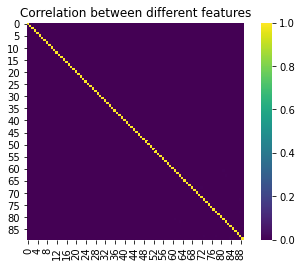

In [91]:
# Corelation matrix using heatmap
correlation = pd.DataFrame(X).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [92]:
#Concatenating new PCA with output variable
benz_final = pd.concat([X,y],1)
benz_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,y
0,0.817092,-1.359265,1.939803,0.853478,1.622783,-0.043883,0.554807,-0.996328,0.204935,-0.291400,-1.759784,-0.732858,0.022901,0.103165,0.005066,0.353849,-0.478674,-0.451481,-0.432311,0.423494,-0.284560,1.106894,-0.213329,1.330134,-0.755060,-0.123048,-0.119565,-0.306228,0.487735,-0.273520,-0.240807,0.015881,-0.782205,-1.300274,0.778692,-0.823134,-0.029782,0.728230,0.256305,-0.292422,...,0.313650,-0.830504,0.547940,0.348069,0.915302,1.095440,-0.243499,-0.916277,-0.302358,-0.496893,0.525321,0.517165,0.083339,0.004189,0.165519,0.227835,1.293278,-0.363413,0.047126,-0.229462,0.286518,0.640170,0.112319,-0.161883,-0.220598,-0.349378,0.380314,0.047328,-0.091899,0.214033,-0.075824,-0.483538,0.330652,-0.579955,-0.265383,0.447330,0.413687,-0.011357,-0.152889,130.81
1,-0.101499,-1.294395,-0.091489,-0.798066,0.283724,0.142604,1.108107,-0.729348,-0.021378,0.617965,-0.003501,1.033322,-0.067907,0.558172,-1.007641,-0.587514,-0.030229,0.109985,0.905232,-0.178176,-0.819148,0.644003,-0.326036,1.385298,-0.041167,0.226227,0.298688,-0.149135,-0.068801,0.191724,0.072372,-0.557415,-0.379951,0.081646,0.632649,0.109896,-0.055312,0.069419,-0.097073,-0.031349,...,0.012835,-0.301966,0.384443,-0.307290,0.421450,0.045739,-0.084179,0.225756,-0.035703,-0.005043,0.575118,-0.036846,0.074006,-0.078157,-0.247311,0.298800,-0.149666,-0.096051,-0.098920,-0.197622,-0.079449,0.232319,-0.065842,0.064589,0.203187,0.117476,0.059465,0.095380,0.105414,0.061007,0.229765,-0.223028,-0.090008,-0.227463,0.123636,-0.065530,0.312734,0.060738,-0.418300,88.53
2,-0.668524,-2.434781,1.698086,2.350910,0.325666,3.751923,-1.188095,0.670800,-0.932893,-0.213914,0.354790,-0.328553,0.274762,0.183131,0.370837,0.815147,-0.364870,-0.862997,0.492149,0.534377,0.865020,-0.547174,0.557827,0.658794,-0.079364,-0.111868,0.586790,0.302730,0.400391,-0.545707,0.005842,0.160260,0.083351,0.419358,-0.284216,0.407077,-0.315297,-0.079300,0.220770,0.068354,...,0.029075,-0.421502,-0.331265,0.194280,0.199210,0.079378,-0.111906,0.075293,-0.052231,-0.280329,-0.339860,0.023118,0.237199,0.063665,-0.108337,0.340849,-0.079866,0.273627,-0.286912,0.023747,-0.111197,0.018568,0.036924,-0.026934,-0.000686,0.132438,-0.125486,0.088762,0.409595,0.014308,0.157409,0.302021,0.290860,-0.391175,-0.012261,0.134717,0.258455,0.151978,-0.272570,76.26
3,-0.473694,-2.720429,0.416054,2.879830,-0.511009,3.760519,-0.306703,-0.032686,-1.235689,0.253637,0.277089,0.179758,-0.282646,0.760401,0.321801,0.326144,0.278162,-0.822854,0.883440,0.583493,-0.299245,-0.305408,0.223216,-0.277047,-1.105696,0.049618,-0.271144,0.079206,-0.301779,-0.122543,0.304068,-0.176855,-0.504299,0.890807,-0.271102,0.191641,0.098378,0.379530,0.116954,0.186258,...,0.076352,-0.134522,0.383089,-0.569921,-0.320637,-0.216314,0.058186,0.038534,0.308762,-0.264642,0.024282,-0.198608,0.003048,-0.026744,-0.048192,0.129462,-0.084878,0.020898,-0.021025,-0.270546,0.127379,-0.018452,-0.081633,-0.038699,0.174810,0.127347,-0.117987,-0.266283,-0.001941,0.107230,0.037889,0.057730,-0.112787,0.003237,-0.158709,-0.087078,0.052480,-0.047900,-0.068101,80.62
4,-0.508665,-2.710780,0.225744,3.100796,-0.751432,3.860358,-0.450389,0.126022,-1.798756,-0.298384,0.093160,0.331889,-0.082668,0.036821,-0.134852,-0.203942,-0.099040,-0.212641,0.426820,0.165326,0.006922,0.422700,0.332799,0.256462,-0.287550,-0.128879,-0.452827,0.338459,-0.714331,0.247097,0.595427,0.177644,-0.597224,-0.398800,-0.123059,-0.224537,0.157558,-0.119038,-0.341667,0.135207,...,-0.013146,0.107100,-0.008850,-0.178070,0.049033,0.107962,0.021139,-0.052928,0.329763,-0.117951,-0.077404,-0.473054,0.211969,-0.184704,0.089085,-0.437784,0.132511,0.145933,-0.183182,-0.515872,0.117886,-0.077821,-0.011736,0.184376,-0.133534,-0.006167,-0.258103,-0.090949,-0.013670,0.227292,0.057336,0.100202,0.057609,-0.082695,-0.351543,

In [0]:
#Splitting the data using train test method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Selection

In [94]:
xgmodel = xgb.XGBRegressor()
xgmodel.fit(X_train,y_train)
print(xgmodel)

[13:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [95]:
y_xgpred = xgmodel.predict(data=X_test)
xg_df = pd.DataFrame()
xg_df["Prediction"] = y_xgpred
xg_df["Actual"] = y_test.values
xg_df

,Prediction,Actual
0,96.491020,97.94
1,96.839958,96.41
2,111.389580,105.83
3,78.100586,79.09
4,112.214592,108.69
...,...,...
1258,96.850990,115.25
1259,97.254425,88.59
1260,92.596214,92.90
1261,93.587967,98.24


In [96]:
xgb_mse = mean_squared_error(xg_df["Actual"],xg_df["Prediction"])**(0.5)
xgb_mae = mean_absolute_error(y_true=xg_df["Actual"], y_pred=xg_df["Prediction"])
print('XGB MAE: {}'.format(xgb_mae))
print('XGB RMSE: {}'.format(xgb_mse))

XGB MAE: 6.008764760069496
XGB RMSE: 9.963425563307208


In [97]:
y_avg = np.array([y_test.mean()] * len(y_test))
null_mse = mean_squared_error(y_true=xg_df["Actual"], y_pred=y_avg)**0.5
null_mae = mean_absolute_error(y_true=xg_df["Actual"], y_pred=y_avg)
print('Null MAE: {}'.format(null_mae))
print('Null MSE: {}'.format(null_mse))

Null MAE: 10.313586309663737
Null MSE: 13.37075648151259


In [98]:
  ranmodel = RandomForestRegressor( )
ranmodel.fit(X_train,y_train)
print(ranmodel)
y_ranpred = ranmodel.predict(X_test)
ran_df = pd.DataFrame()
ran_df["Prediction"] = y_ranpred
ran_df["Actual"] = y_test.values
print(ran_df)
ran_rmse = mean_squared_error(ran_df["Actual"],ran_df["Prediction"])**(0.5)
ran_mae = mean_absolute_error(y_true=ran_df["Actual"], y_pred=ran_df["Prediction"])
print('RandomForest MAE: {}'.format(ran_mae))
print('RandomForest RMSE: {}'.format(ran_rmse))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
      Prediction  Actual
0     101.617625   97.94
1      93.571700   96.41
2     105.685533  105.83
3      77.794733   79.09
4     112.316875  108.69
...          ...     ...
1258  101.112574  115.25
1259   96.165467   88.59
1260   97.215000   92.90
1261   93.939300   98.24
1262  106.826000   91.46

[1263 rows x 2 columns]
RandomForest MAE: 6.427855436190886
RandomForest RMSE: 10.37758871461091


In [99]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
print(linmodel)
y_linpred = linmodel.predict(X_test)
lin_df = pd.DataFrame()
lin_df["Prediction"] = y_linpred
lin_df["Actual"] = y_test.values
print(lin_df)
lin_rmse = mean_squared_error(lin_df["Actual"],lin_df["Prediction"])**(0.5)
lin_mae = mean_absolute_error(y_true=lin_df["Actual"], y_pred=lin_df["Prediction"])
print('linearRegression MAE: {}'.format(lin_mae))
print('linearRegression MSE: {}'.format(lin_rmse))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
      Prediction  Actual
0      91.633881   97.94
1      93.517324   96.41
2     117.455035  105.83
3      73.166108   79.09
4     114.139940  108.69
...          ...     ...
1258   93.923045  115.25
1259   92.538540   88.59
1260   97.184332   92.90
1261   93.097271   98.24
1262   94.327380   91.46

[1263 rows x 2 columns]
linearRegression MAE: 5.824879470867066
linearRegression MSE: 9.883901080760458


In [100]:
Adamodel = AdaBoostRegressor()
Adamodel.fit(X_train,y_train)
print(Adamodel)
y_Adapred = Adamodel.predict(X_test)
Ada_df = pd.DataFrame()
Ada_df["Prediction"] = y_Adapred
Ada_df["Actual"] = y_test.values
print(Ada_df)
Ada_rmse = mean_squared_error(Ada_df["Actual"],Ada_df["Prediction"])**(0.5)
Ada_mae = mean_absolute_error(y_true=Ada_df["Actual"], y_pred=Ada_df["Prediction"])
print('AdaBoostRegression MAE: {}'.format(Ada_mae))
print('AdaBoostRegression RMSE: {}'.format(Ada_rmse))

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
      Prediction  Actual
0     104.315714   97.94
1     101.563914   96.41
2     112.199435  105.83
3      93.893803   79.09
4     111.239443  108.69
...          ...     ...
1258  103.332036  115.25
1259  103.153010   88.59
1260  102.809446   92.90
1261  103.153010   98.24
1262  107.125361   91.46

[1263 rows x 2 columns]
AdaBoostRegression MAE: 9.942116254448564
AdaBoostRegression RMSE: 12.732594699316522


In [101]:
svmmodel = svm.SVR()
svmmodel.fit(X_train,y_train)
print(svmmodel)
y_svmpred = svmmodel.predict(X_test)
svm_df = pd.DataFrame()
svm_df["Prediction"] = y_svmpred
svm_df["Actual"] = y_test.values
print(svm_df)
svm_rmse = mean_squared_error(svm_df["Actual"],svm_df["Prediction"])**(0.5)
svm_mae = mean_absolute_error(y_true=svm_df["Actual"], y_pred=svm_df["Prediction"])
print('svm MAE: {}'.format(svm_mae))
print('svm RMSE: {}'.format(svm_rmse))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
      Prediction  Actual
0      91.309864   97.94
1      94.066801   96.41
2     107.187568  105.83
3      81.722807   79.09
4     109.187225  108.69
...          ...     ...
1258   95.384087  115.25
1259   94.706452   88.59
1260   92.507306   92.90
1261   94.328033   98.24
1262   93.608061   91.46

[1263 rows x 2 columns]
svm MAE: 5.699088583930524
svm RMSE: 10.278501168762093


#Findings from model selection:

svm MAE: 5.693211530420504

svm RMSE: 10.277057917801248

AdaBoostRegression MAE: 9.587827267146107

AdaBoostRegression RMSE: 12.467787510175427

linearRegression MAE: 5.785563995814321

linearRegression MSE: 9.847738219558527

RandomForest MAE: 6.440086303428468

RandomForest RMSE: 10.40888043460024

XGB MAE: 6.0197097353055575

XGB RMSE: 9.943052325162277

As we see many outliers in the output variable, we are selecting the MAE metrics

we are selecting SVM algorithm for the best MAE score


In [102]:
# Using Stacking based approach we have selected Linear regression, Adaboost, XGBoost as base learners and SVM as the final estimator
estimators = [
('lr', LinearRegression()),
('ada',AdaBoostRegressor()),
('xgbmodel', xgb.XGBRegressor()),
]
benz_stack = StackingRegressor(
estimators=estimators,
final_estimator=svm.SVR()
)
benz_stack.fit(X_train, y_train)

[13:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=None,
                  estimators=[('lr',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('ada',
                               AdaBoostRegressor(base_estimator=None,
                                                 learning_rate=1.0,
                                                 loss='linear', n_estimators=50,
                                                 random_state=None)),
                              ('xgbmodel',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,...
                                            missing=None, n_estimators=100,
                                            n_jobs=1, n

In [103]:
benz_stack_pred = benz_stack.predict(X_test)
benz_stack_df = pd.DataFrame()
benz_stack_df["Prediction"] = benz_stack_pred
benz_stack_df["Actual"] = y_test.values
print(benz_stack_df)
benz_stack_rmse = mean_squared_error(benz_stack_df["Actual"],benz_stack_df["Prediction"])**(0.5)
benz_stack_mae = mean_absolute_error(y_true=benz_stack_df["Actual"], y_pred=benz_stack_df["Prediction"])
print('Benz Stacking MAE: {}'.format(benz_stack_mae))
print('Benz Stacking RMSE: {}'.format(benz_stack_rmse))

      Prediction  Actual
0      91.275090   97.94
1      91.423695   96.41
2     111.525802  105.83
3      79.631289   79.09
4     111.900912  108.69
...          ...     ...
1258   91.490104  115.25
1259   91.376961   88.59
1260   92.275570   92.90
1261   91.554644   98.24
1262   92.677048   91.46

[1263 rows x 2 columns]
Benz Stacking MAE: 5.473044386151171
Benz Stacking RMSE: 10.130648146208006


#Note

Using Stacking approach we are able to see good score compared to SVM


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


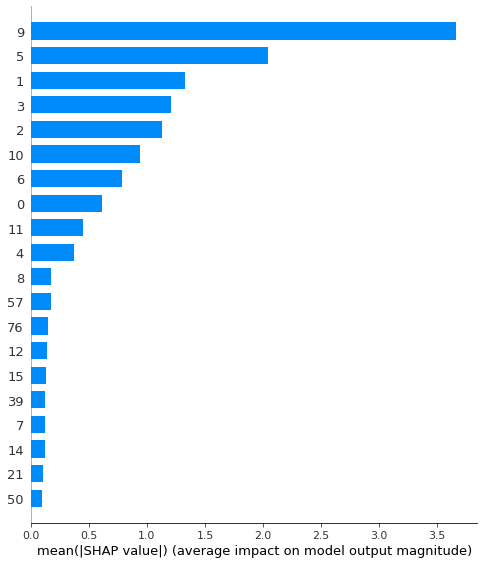

In [104]:
import shap
shap_values = shap.TreeExplainer(ranmodel).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Note:

Since we have used PCA it transformed the data and lost the interpretability of the features

using Shap we have ran against random forest algorith to find the best feature.